<h3>Project: Investigate a Dataset (TMDb_Movies Dataset)</h3>

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, budget, cast and revenue.
  
For the dataset, i would like to pose the following questions
<b><h2>Questions</h2></b>
<ol>
    <li>Year in which most movies were released</li>
    <li>Popular Genre</li>
    <li>Movie Genre by Highest/Most Vote Counts</li>
    <li>Popular Keywords</li>
    <li>Top-ten movies by revenue</li>
    <li>Do Popularity depend on Runtime</li>
    <li>Movie Runtime over the years</li>
    <li>Popularity of Big Budget Movies</li>
    <li>Popular Actors</li>
</ol>

<h3>Importing Data</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

movie = pd.read_csv('tmdb-movies.csv')
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<h3>Cleaning Data</h3>

In [2]:
movie.shape

(10866, 21)

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#drop columns not needed for analysis
movie.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [6]:
movie.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


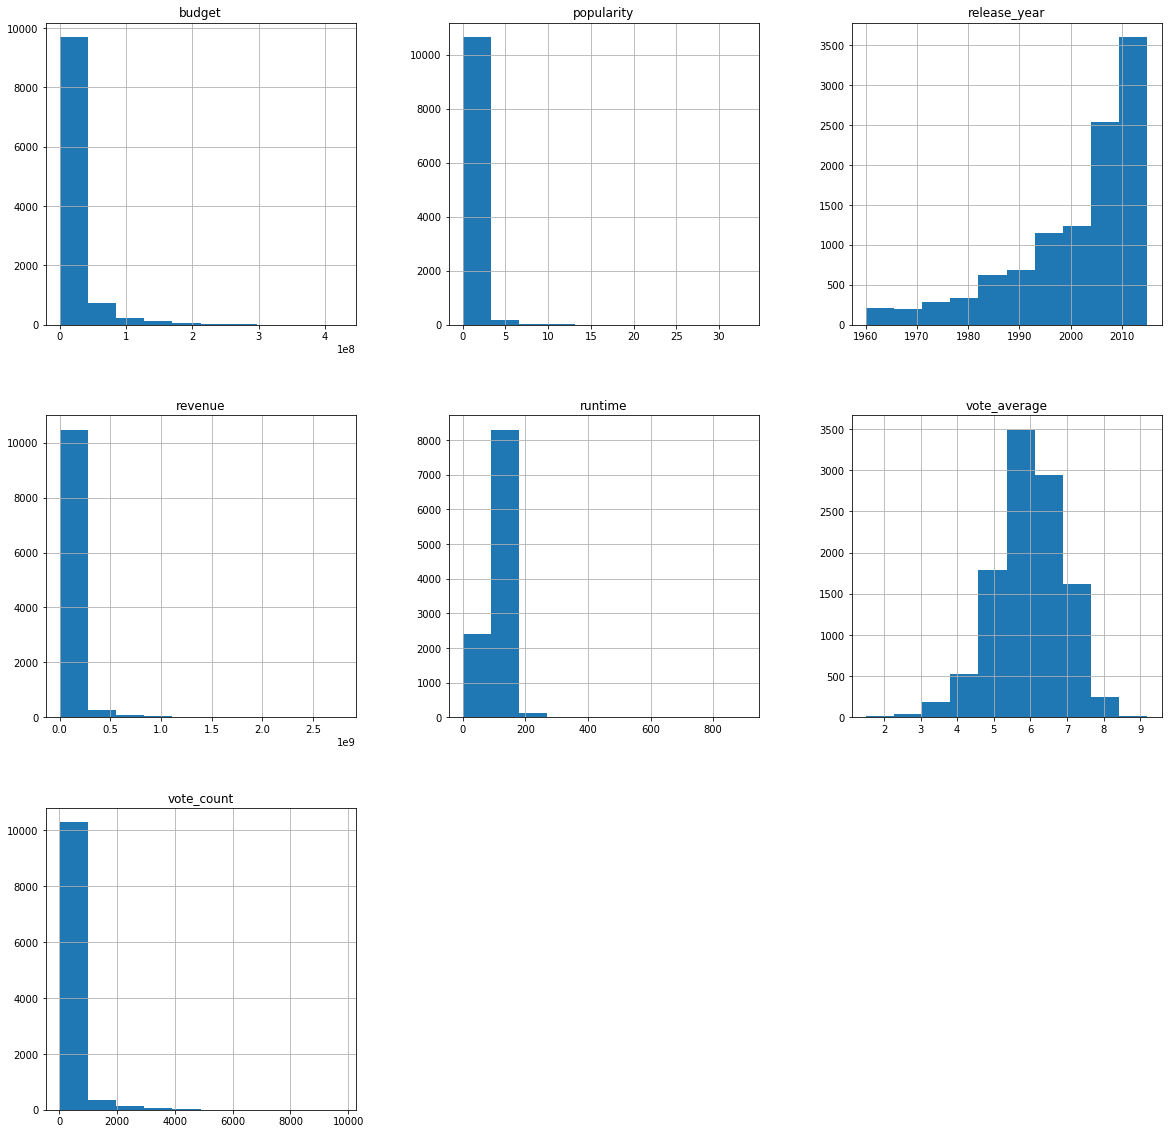

In [7]:
movie.hist(figsize=(20,20));

In [8]:
#split genre, cast, production_companies & keywords
movie['genre'] = movie['genres'].str.split('|', expand=True)[0]
movie['genres'] = movie['genres'].str.replace('|',',')

movie['actor'] = movie['cast'].str.split('|', expand=True)[0]
movie['actor'] = movie['cast'].str.replace('|',',')

movie['keyword'] = movie['keywords'].str.split('|', expand=True)[0]
movie['keyword'] = movie['keywords'].str.replace('|',',')

movie['production_companies'] = movie['production_companies'].str.split('|', expand=True)[0]

In [9]:
# convert budget & revenue value to billion
movie['budget'] = movie['budget']/100000000
movie['revenue'] = movie['revenue']/100000000

In [10]:
# rename budget & revenue columns
movie = movie.rename(columns={'budget': 'budget_in_billion', 'revenue': 'revenue_in_billion'})

In [11]:
movie.head()

,popularity,budget_in_billion,revenue_in_billion,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre,actor,keyword
0,32.985763,1.5,15.135288,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"Action,Adventure,Science Fiction,Thriller",Universal Studios,6/9/15,5562,6.5,2015,Action,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...","monster,dna,tyrannosaurus rex,velociraptor,island"
1,28.419936,1.5,3.784364,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"Action,Adventure,Science Fiction,Thriller",Village Roadshow Pictures,5/13/15,6185,7.1,2015,Action,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...","future,chase,post-apocalyptic,dystopia,australia"
2,13.112507,1.1,2.952382,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"Adventure,Science Fiction,Thriller",Summit Entertainment,3/18/15,2480,6.3,2015,Adventure,"Shailene Woodley,Theo James,Kate Winslet,Ansel...","based on novel,revolution,dystopia,sequel,dyst..."
3,11.173104,2.0,20.681782,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,"Action,Adventure,Science Fiction,Fantasy",Lucasfilm,12/15/15,5292,7.5,2015,Action,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...","android,spaceship,jedi,space opera,3d"
4,9.335014,1.9,15.062494,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,"Action,Crime,Thriller",Universal Pictures,4/1/15,2947,7.3,2015,Action,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...","car race,speed,revenge,suspense,car"


<h3>Exploration Phase</h3>

<b><h3>Year in which most movies were released.</h3></b>

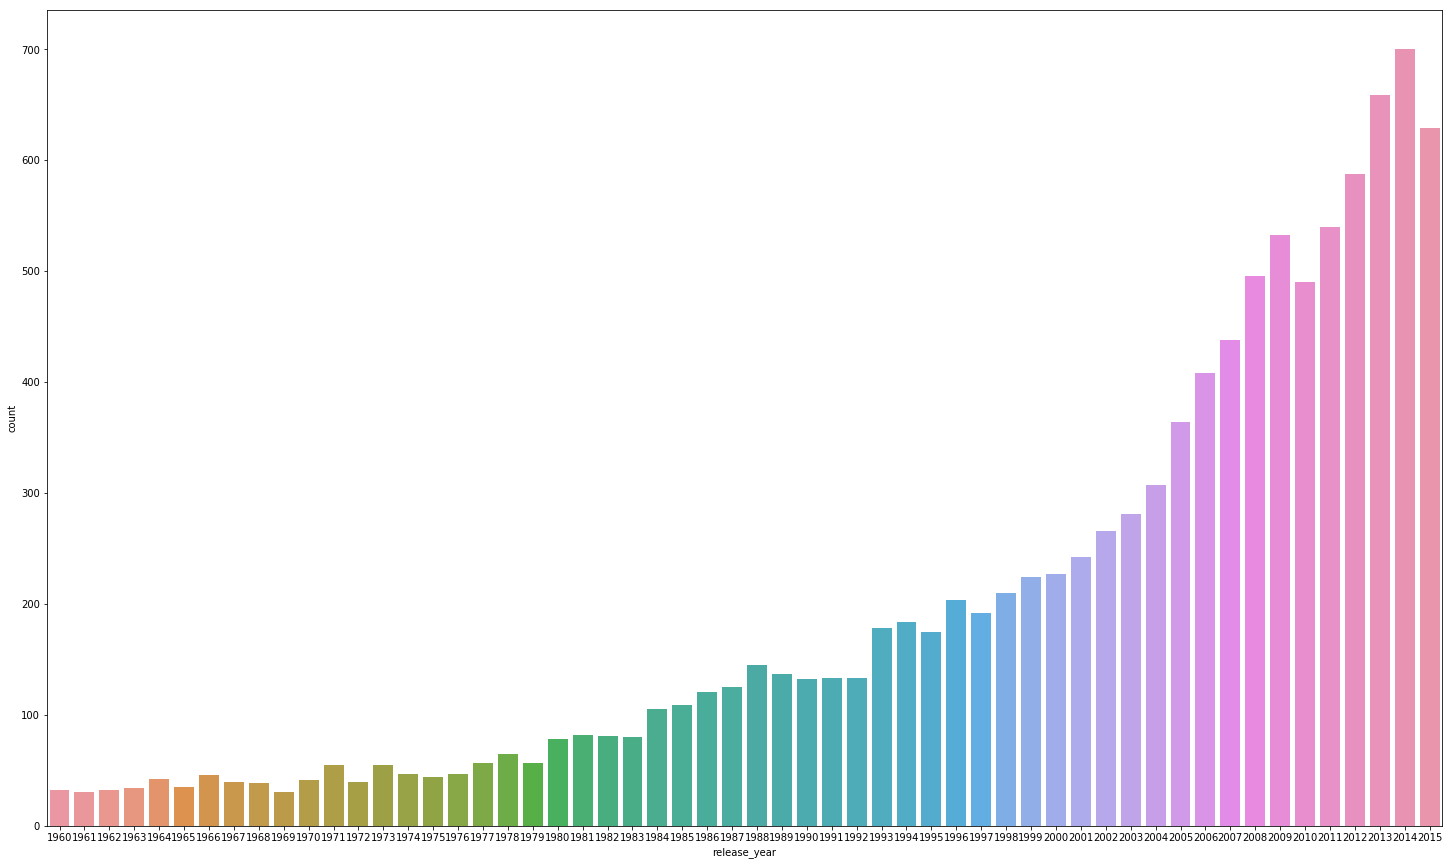

In [12]:
plt.figure(figsize=(25, 15))
sns.countplot(x='release_year', data=movie)
plt.show()

<i>This visualisation aims to find out in which year most movies where released. From the figure, we can conclude that <b>2014</b> saw most movie releases, followed by <b>2013 & 2015.</b></i>

<b><h3>Popular Genres</h3></b>

In [13]:
# mean of popularity for all the genres
popular_genre = movie.groupby('genre')['popularity'].mean().sort_values(ascending=False)
popular_genre

genre
Adventure          1.217868
Science Fiction    1.073096
Fantasy            0.865390
Action             0.836394
Animation          0.810370
War                0.767041
History            0.764636
Family             0.730987
Romance            0.704157
Crime              0.693807
Western            0.690646
Thriller           0.673381
Mystery            0.596896
Drama              0.552446
Comedy             0.537133
Horror             0.468611
Music              0.447730
TV Movie           0.246190
Documentary        0.177023
Foreign            0.167124
Name: popularity, dtype: float64

<i>From the analysis <b>Adventure</b> is most popular genre, followed by <b>Sci-fi, Fantasy & Action.</b></i>

<b><h3>Movie Genre by Highest/Most Vote Counts</h3></b>

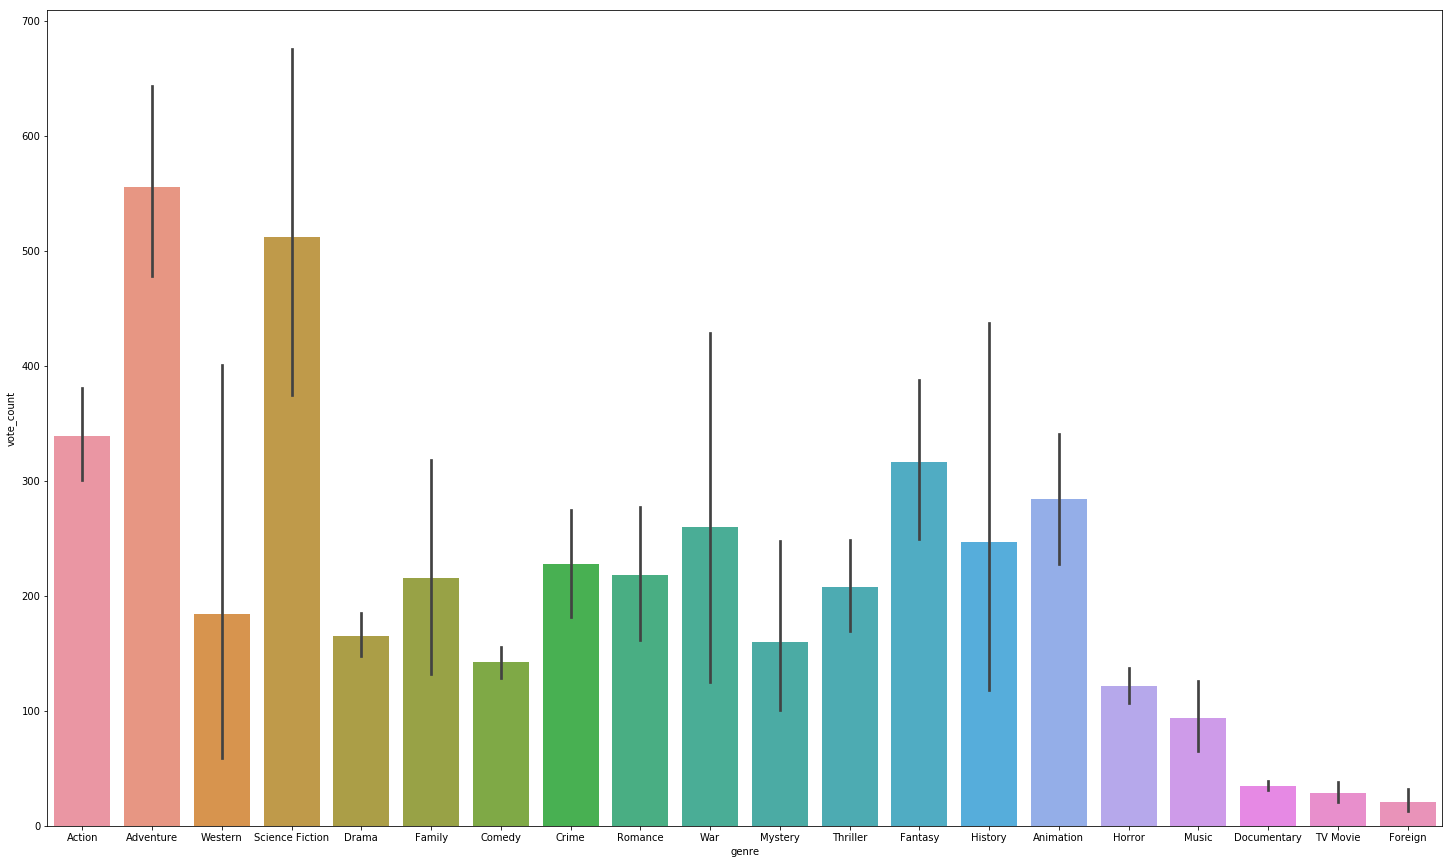

In [14]:
plt.figure(figsize=(25, 15))
sns.barplot(x='genre', y='vote_count', data=movie)
plt.show()

<i>This visualization, shows a barplot of Genre vs Vote Count, to determine which genre has the highest count. From the analysis it is clear that, <b>Adventure</b> genre has the most number of counts followed by <b>Sci-fi, Action & Fantasy.<br> The finding also support our previous analysis of popular genres.</b></i>

<b><h3>Popular Keywords</h3></b>

In [15]:
# split the keywords
split_keyword = movie['keyword'].str.split(',', expand=True)[0]
#store in a variable
key_word =  movie.groupby('keyword')['popularity'].count().sort_values(ascending=False)
# top-10 popular keywords
popular_keywords = key_word.head(10)

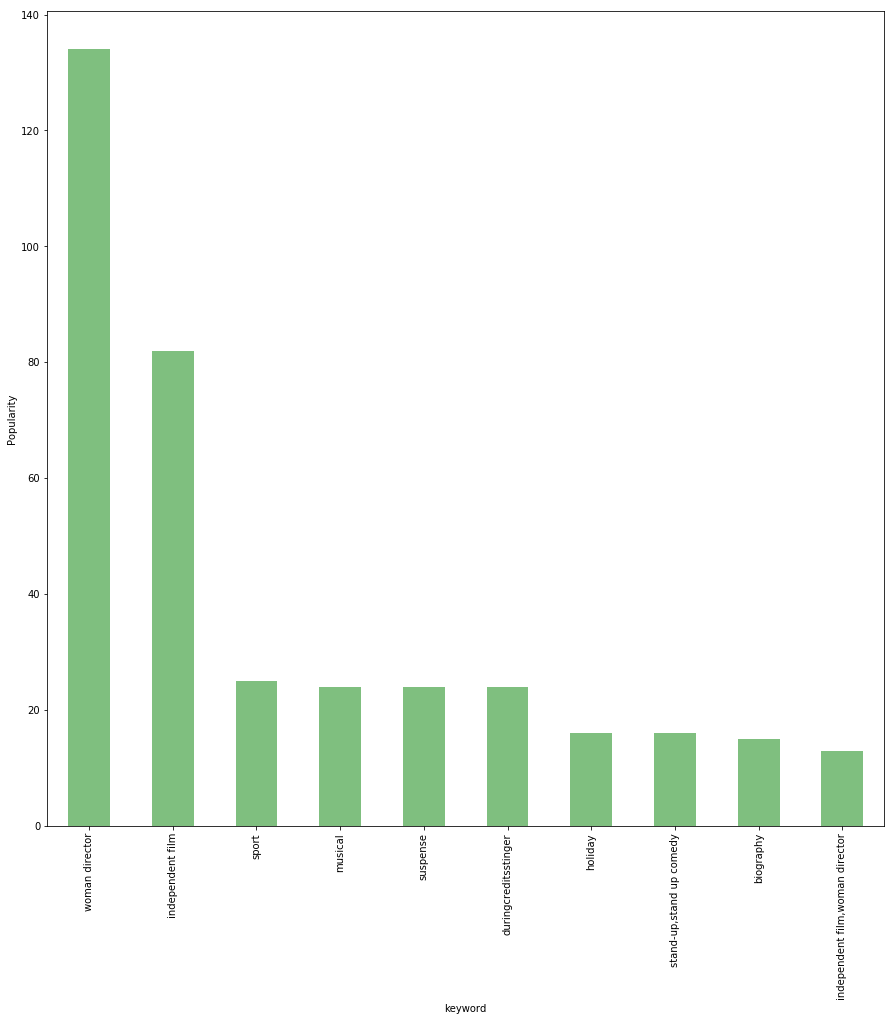

In [16]:
plt.figure(figsize=(15,15))
plt.ylabel('Popularity')
popular_keywords.plot(kind='bar', color='g', alpha=0.5)
plt.show()

<p><i>From the above analysis we can conclude that the popular keywords people use to search a movie are <b>woman director</b> followed by <b>independent film, sport, musical, suspense. Those keywords can be helpful while building a movie recommendation system.</b></i></p>

<b><h3>Top-ten movies by Revenue</h3></b>

In [17]:
# get the revenue of the movies
top_movies = movie.groupby('original_title')['revenue_in_billion'].sum().sort_values(ascending=False)
top_ten = top_movies.head(10)
top_ten

original_title
Avatar                                          27.815058
Star Wars: The Force Awakens                    20.681782
Titanic                                         18.450342
The Avengers                                    15.680807
Jurassic World                                  15.135288
Furious 7                                       15.062494
Avengers: Age of Ultron                         14.050358
Harry Potter and the Deathly Hallows: Part 2    13.278178
Frozen                                          12.772849
Iron Man 3                                      12.154400
Name: revenue_in_billion, dtype: float64

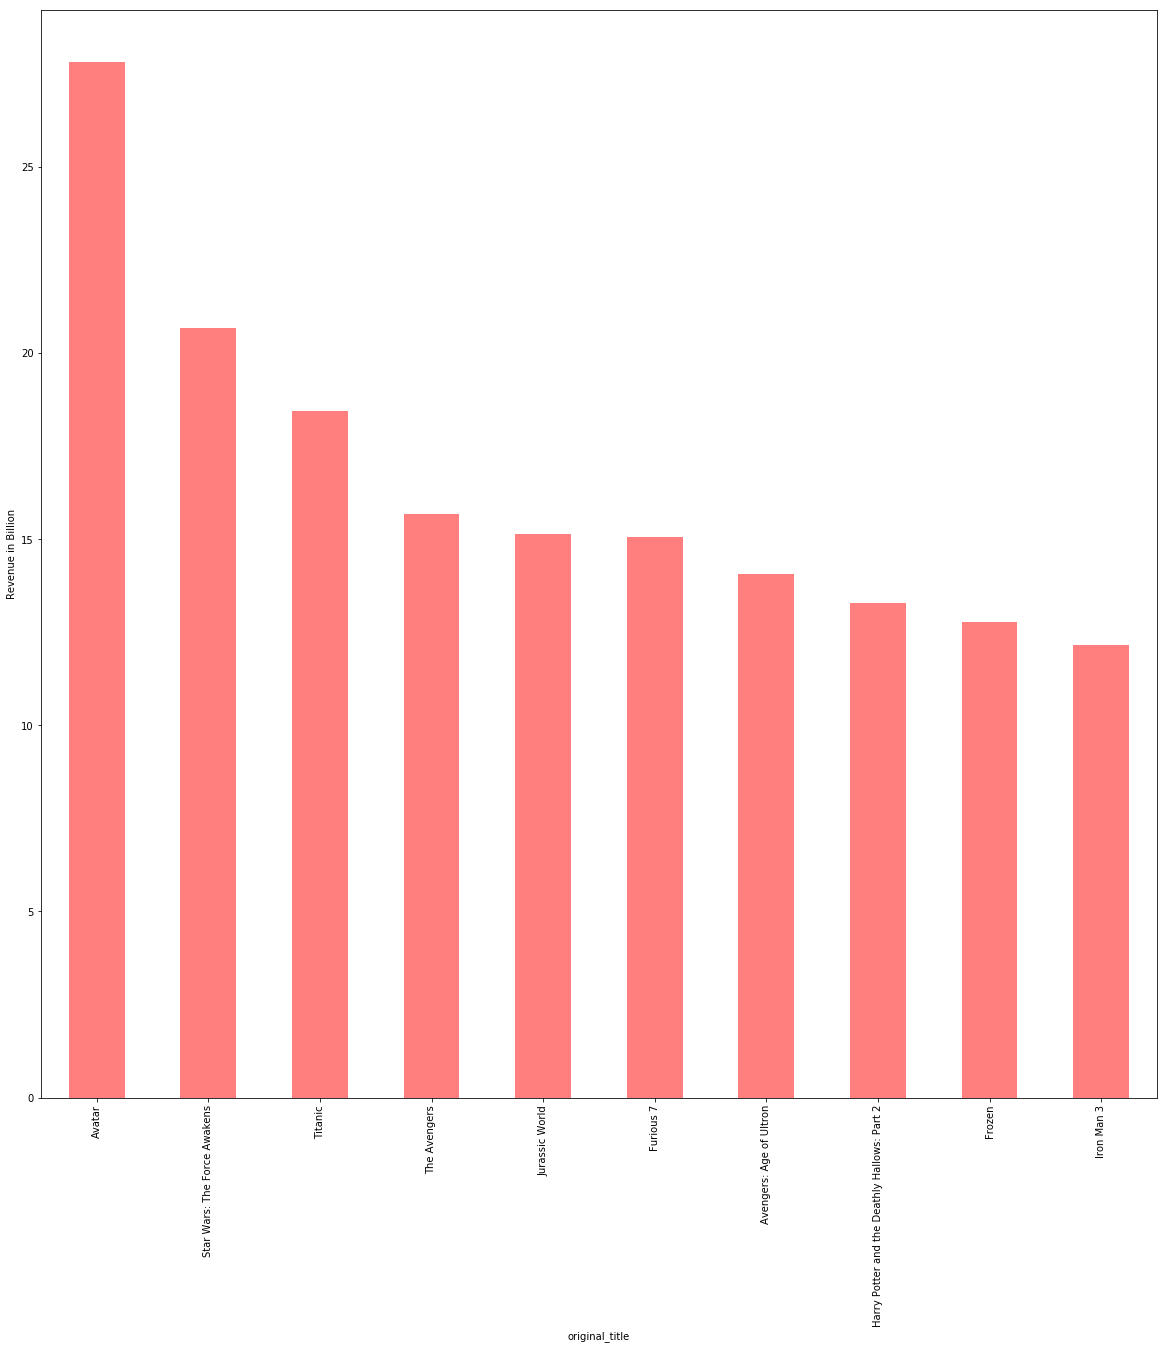

In [18]:
plt.figure(figsize=(20,20))
plt.ylabel('Revenue in Billion')
top_ten.plot(kind='bar', color='r', alpha=0.5)
plt.show()

<i>This visualisation, shows the analysis of the revenues of the top-ten movies according to the revenue they generated. From the figure above we can conclude that <b>Avatar</b> has the highest revenue, closely followed by <b>Star Wars: The force awakens & Titanic</b></i>

<h3>Do Popularity depend on Runtime</h3>

<Figure size 1440x720 with 0 Axes>

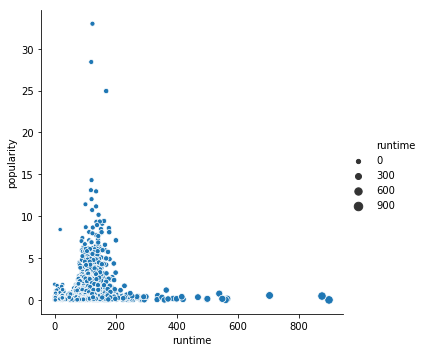

In [19]:
plt.figure(figsize=(20,10))
sns.relplot(x='runtime', y='popularity', size="runtime", data=movie)
plt.show()

<i>In this analysis, we want to see if the runtime of the movie determine the popularity of movie. From the figure above we can see that movies with runtime between <b> 100 & 150 </b> are most popular.</i>

<h3>Movie Runtime over the years</h3>

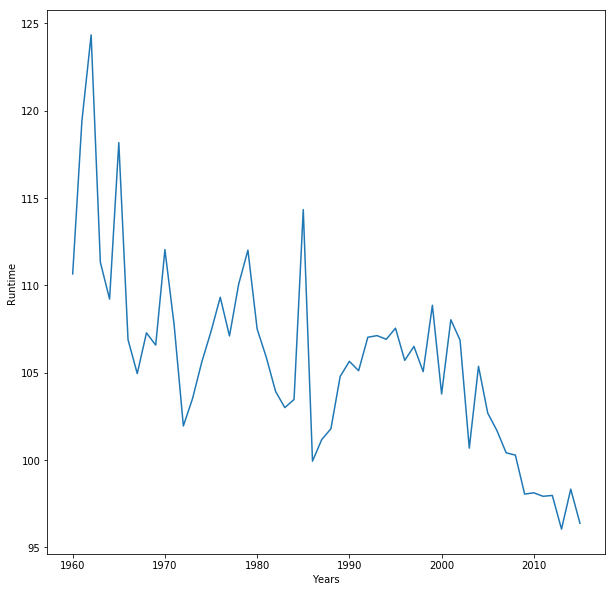

In [20]:
# get the avg.runtime of movies by the year they were released
avg_runtime = movie.groupby('release_year')['runtime'].mean()

plt.figure(figsize=(10, 10))
plt.xlabel('Years')
plt.ylabel('Runtime')
plt.plot(avg_runtime)
plt.show()

<i>The plot shows the average runtime of movies over the years. As we can see the runtime of movies have been reducing, movies released in the <b>1960's had runtime of around 125 minutes.</b> Although there was an increase in runtime in the mid <b>1980's</b>, movies <b>post 2007 have a runtime of less than 100 minutes.</b></i>

<h3>Popularity of Big Budget Movies</h3>

In [21]:
# sort movies according to popularity
most_popular = movie.sort_values(by=['popularity'], ascending=False).head()
most_popular

,popularity,budget_in_billion,revenue_in_billion,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,genre,actor,keyword
0,32.985763,1.50,15.135288,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"Action,Adventure,Science Fiction,Thriller",Universal Studios,6/9/15,5562,6.5,2015,Action,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...","monster,dna,tyrannosaurus rex,velociraptor,island"
1,28.419936,1.50,3.784364,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"Action,Adventure,Science Fiction,Thriller",Village Roadshow Pictures,5/13/15,6185,7.1,2015,Action,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...","future,chase,post-apocalyptic,dystopia,australia"
629,24.949134,1.65,6.217525,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,169,"Adventure,Drama,Science Fiction",Paramount Pictures,11/5/14,6498,8.0,2014,Adventure,"Matthew McConaughey,Jessica Chastain,Anne Hath...","saving the world,artificial intelligence,fathe..."
630,14.311205,1.70,7.733124,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,marvel comic|spaceship|space|scene during end ...,121,"Action,Science Fiction,Adventure",Marvel Studios,7/30/14,5612,7.9,2014,Action,"Chris Pratt,Zoe Saldana,Dave Bautista,Vin Dies...","marvel comic,spaceship,space,scene during end ..."
2,13.112507,1.10,2.952382,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"Adventure,Science Fiction,Thriller",Summit Entertainment,3/18/15,2480,6.3,2015,Adventure,"Shailene Woodley,Theo James,Kate Winslet,Ansel...","based on novel,revolution,dystopia,sequel,dyst..."


In [22]:
# get budget for those movies
mp_budget = most_popular.groupby('original_title')['budget_in_billion'].sum()

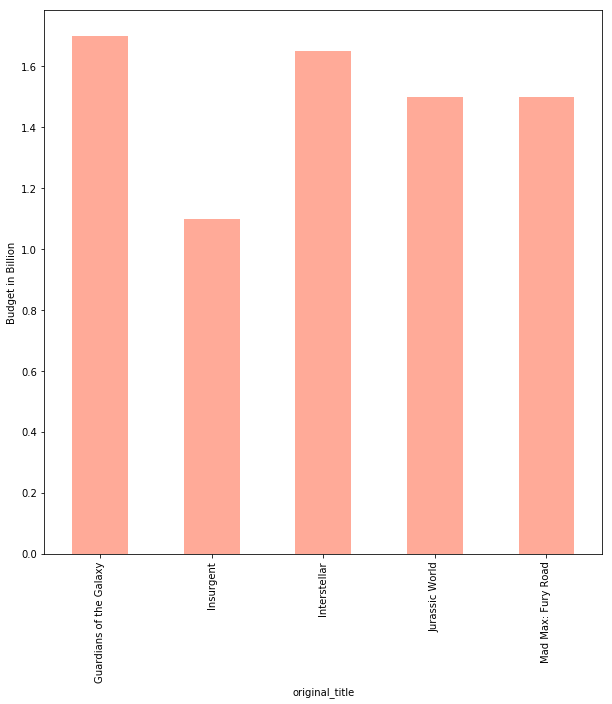

In [23]:
plt.figure(figsize=(10,10))
plt.ylabel('Budget in Billion')
mp_budget.plot(kind='bar', color='#ff5733', alpha=0.5)
plt.show()

<i>From the above analysis we can conclude that big budget movies tend to be most popular among audience</i>

<h3>Popular Actors</h3>

In [24]:
actor = movie['actor'].str.split(',', expand=True)[0]
actor.value_counts().sort_values(ascending=False).head(10)

Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Johnny Depp              37
Sylvester Stallone       37
Tom Hanks                37
Jean-Claude Van Damme    35
Steven Seagal            35
Denzel Washington        33
Name: 0, dtype: int64

<i>From the above analysis we can conclude that popular actors are <b>Nicolas Cage</b> followed by <b>Robert De Niro & Bruce Willis.</b></i>

<h3>Conclusion</h3>

From all the analysis made on the Movies and their Genre, Runtime, Popularity, Budget, Actors. The conclusion can be made as-

Movies tend make revenues based on: Genre, Runtime, Popularity, Actors(lead role)

So from the given data, movies with Genre like Adventure,Science Fiction,Action and Fantasy, based on the popularity and the run time, the actors in the movies; a movie can make a great ROI.